<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_013a_Trojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
def addbody(m, c):
  global coms   # center of mass
  global mass, config
  '''
  천체 데이타를 배위 정보에 추가하는 함수
  m: 천체의 질량
  c: [x, y, z, vx, vy, vz] 천체의 위치와 속도 성분(직교직선좌표)
  '''
  mass = np.append(mass, [m])
  config = np.append(config, [c], axis = 0)
  coms += c * m

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a.reshape(-1, 6)

array([[1, 2, 3, 4, 5, 6]])

In [ ]:
def flatten(array):
  '''
  n차원 배열을 1차원 배열로 바꾸어 리턴한다
  '''
  return array.reshape(-1,)

In [ ]:
'''
Gravitational Constant
'''
G = 6.67e-11

In [ ]:
def gravity(t, S):
    '''
    천체들의 현 배위 정보로부터 중력 상호작용을 합성하여
    위치와 속도 성분들의 변화율 (dSdt) 를 구한다
    t: 현재 시각 데이타
    S: 현재 배위 데이타
    '''
    n = len(mass)
    dSdt = np.zeros(n*6)
    for i in range(n):
        x, y, z, vx, vy, vz = S[i * 6 : (i + 1) * 6]
        ax, ay, az = 0, 0, 0
        for j in range(n):
            if j != i:
                m2 = mass[j]
                x2, y2, z2 = S[j*6 : j*6+3]
                dx, dy, dz = x2-x, y2-y, z2-z
                dist3 = np.power(dx**2 + dy**2 + dz**2, 1.5)  # cube of distance
                ax += G * m2 * dx / dist3
                ay += G * m2 * dy / dist3
                az += G * m2 * dz / dist3
        dSdt[i*6:(i+1)*6] = np.array([vx, vy, vz, ax, ay, az])
    return dSdt

In [ ]:
'''
천체 데이타
'''
"목성의 질량, 궤도반지름, 궤도속력"
mJ = 1.89e27; rJ = 778e9; vJ = 1.307e4

"목성의 궤도 각속력"
omega = vJ / rJ # Jupiter's orbital angular speed

"태양의 질량, 궤도반지름"
mS = 1.9885e30; rS = rJ * mJ / mS; vS = vJ * mJ / mS  # Solar mass, position and initial speed

"가상적인 트로이 소행성의 질량, 궤도 반지름, 궤도 속력, L4점의 방위각(alpha) 및 운동방향(beta)"
mT = 1e5; rT = rJ; vT = vJ * 0.99; alpha = np.pi/3; beta = alpha + np.pi/2
"트로이 소행성의 죄표 및 속도 성분"
xT = rT * np.cos(alpha); yT = rT * np.sin(alpha)
vxT = vT * np.cos(beta); vyT = vT * np.sin(beta)

"천체의 질량 목록을 초기화한다"
mass = np.array([]) # List of the mass of celestial bodies

"천체의 배위 정보를 담을 목록을 초기화한다"
config = np.empty((0,6)) # initial configuration of the bodies

"질량중심 데이타"
coms = np.zeros(6) # center of mass configuration

"천체 데이타를 배위 정보에 차례로 추가한다."
addbody(mS, np.array([-rS, 0, 0, 0, -vS, 0])) # Sun data
addbody(mJ, np.array([rJ-rS, 0, 0, 0, vJ-vS, 0])) # Jupiter data
addbody(mT, np.array([xT-rS, yT,0,vxT,vyT-vS,0])) # A fictitious Trojan object

"천체들의 좌표와 속도를 질량중심에 대한 상댓값으로 환산한다."
mtot = mass.sum() # 전체 질량
coms /= mtot                # 질량중심의 배위
print("Before: ", config)
config = np.array([c - coms for c in config]) # 각 천체의 위치와 속도를 질량 중심 기준으로 변환.
config = flatten(config)
print("After: ", config)

Before:  [[-7.39461906e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.24225798e+01  0.00000000e+00]
 [ 7.77260538e+11  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.30575774e+04  0.00000000e+00]
 [ 3.88260538e+11  6.73767764e+11  0.00000000e+00 -1.12057625e+04
   6.45722742e+03  0.00000000e+00]]
After:  [-7.38759741e+08 -3.38510425e-14  0.00000000e+00  5.62993308e-22
 -1.24107838e+01  0.00000000e+00  7.77261240e+11 -3.38510425e-14
  0.00000000e+00  5.62993308e-22  1.30575892e+04  0.00000000e+00
  3.88261240e+11  6.73767764e+11  0.00000000e+00 -1.12057625e+04
  6.45723922e+03  0.00000000e+00]


In [ ]:
coms

array([-7.02165406e+05,  3.38510425e-14,  0.00000000e+00, -5.62993308e-22,
       -1.17960178e-02,  0.00000000e+00])

In [ ]:
'''
scipy.integrate의 solve_ivp 함수를 이용
'''
"시뮬레이션 시작 시각"
t0 = 0                # Starting time of simulation

"시뮬레이션 종료 시각"
tb = 3e10             # Bounding time of simulation

N = 100000             # Number of steps
dt = (tb - t0) / N    # max step size

"시간 영역을 저장할 배열:"
teval = np.linspace(t0, tb, N + 1)

sol = solve_ivp(gravity, (t0, tb), config, t_eval = teval, max_step = dt)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e+05 ...  3.000e+10  3.000e+10]
        y: [[-7.388e+08 -7.388e+08 ... -7.172e+08 -7.163e+08]
            [-3.385e-14 -3.723e+06 ... -1.772e+08 -1.808e+08]
            ...
            [ 6.457e+03  6.400e+03 ... -2.098e+03 -2.162e+03]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 600080
     njev: 0
      nlu: 0

In [ ]:
len(sol.t)

100001

In [ ]:
sol.y.shape

(18, 100001)

In [ ]:
import pandas as pd
'''
각 천체별로 시뮬레이션 결과를 분할
'''
ts = sol.t

class planet_data:
  def __init__(self, data):
    self.x = data[0]
    self.y = data[1]
    self.z = data[2]
    self.vx = data[3]
    self.vy = data[4]
    self.vz = data[5]

sun = planet_data(sol.y[0:6])
jup = planet_data(sol.y[6:12])
tro = planet_data(sol.y[12:])

In [ ]:
sun.x

array([-7.38759741e+08, -7.38750368e+08, -7.38722252e+08, ...,
       -7.18099965e+08, -7.17216991e+08, -7.16315822e+08])

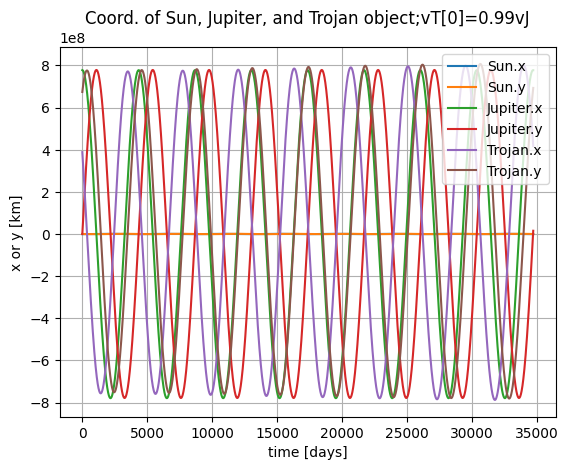

In [ ]:
imin=0
imax=10000
day = 24 * 60 * 60 # in seconds
km = 1000 # in meters

plt.grid()
"태양의 좌표(x,y)를 시간에 따라 플롯한다"
plt.plot(ts[imin:imax]/day, sun.x[imin:imax]/km, label = "Sun.x")
plt.plot(ts[imin:imax]/day, sun.y[imin:imax]/km, label = "Sun.y")

"목성의 좌표(x,y)를 시간에 따라 플롯한다"
plt.plot(ts[imin:imax]/day, jup.x[imin:imax]/km, label = "Jupiter.x")
plt.plot(ts[imin:imax]/day, jup.y[imin:imax]/km, label = "Jupiter.y")

"트로이 소행성의 좌표(x,y)를 시간에 따라 플롯한다"
plt.plot(ts[imin:imax]/day, tro.x[imin:imax]/km, label = "Trojan.x")
plt.plot(ts[imin:imax]/day, tro.y[imin:imax]/km, label = "Trojan.y")

plt.xlabel("time [days]")
plt.ylabel("x or y [km]")
plt.title("Coord. of Sun, Jupiter, and Trojan object;vT[0]={}vJ".format(vT/vJ))
plt.legend()

plt.savefig("py-trojan-xy-{}vJ.png".format(vT/vJ))

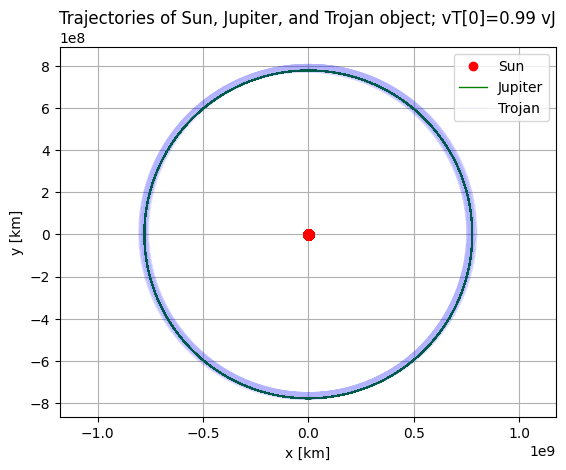

In [ ]:
"천체들의 궤적을 (x,y) 좌표상에 그려본다"
plt.axis('equal')
plt.grid()
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.plot(sun.x/km, sun.y/km, "ro", label = "Sun")
plt.plot(jup.x/km, jup.y/km, "g-", label = "Jupiter", lw=1)
plt.plot(tro.x/km, tro.y/km, "b-", label = "Trojan", lw=0.1, alpha=0.3)
plt.legend()
plt.title(f"Trajectories of Sun, Jupiter, and Trojan object; vT[0]={vT/vJ} vJ")

plt.savefig(f"py-trojan{vT/vJ:.3f}vJ.png")

In [ ]:
"태양을 기준으로 한 목성의 방위각"
alphaJ = np.arctan2(jup.y-sun.y, jup.x-sun.x)

In [ ]:
"목성과 함께 회전하는 좌표계에서 본 각 천체들의 위치를 계산한다"
def rotate(angle, x, y):
  rx = np.cos(-angle) * x - np.sin(-angle) * y
  ry = np.sin(-angle) * x + np.cos(-angle) * y
  return (rx, ry)

"트로이 소행성"
# rotxT = np.cos(-alphaJ) * tro.x - np.sin(-alphaJ) * tro.y
# rotyT = np.sin(-alphaJ) * tro.x + np.cos(-alphaJ) * tro.y
rotxT, rotyT = rotate(alphaJ, tro.x, tro.y)

"목성"
# rotxJ = np.cos(-alphaJ) * jup.x - np.sin(-alphaJ) * jup.y
# rotyJ = np.sin(-alphaJ) * jup.x + np.cos(-alphaJ) * jup.y
rotxJ, rotyJ = rotate(alphaJ, jup.x, jup.y)

"태양"
# rotxS = np.cos(-alphaJ) * sun.x - np.sin(-alphaJ) * sun.y
# rotyS = np.sin(-alphaJ) * sun.x + np.cos(-alphaJ) * sun.y
rotxS, rotyS = rotate(alphaJ, sun.x, sun.y)


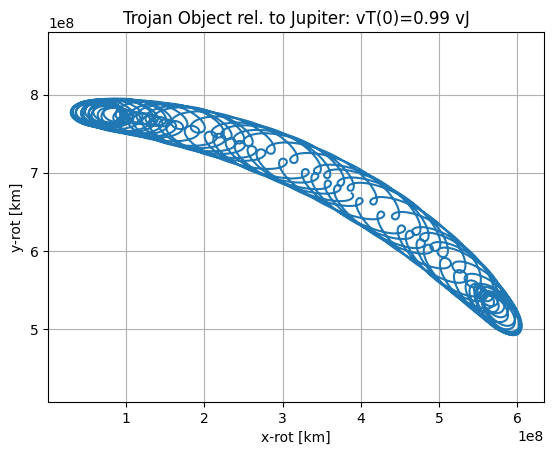

In [ ]:
"목성과 함께 회전하는 좌표계에서 본 트로이 소행성(L4)의 궤적"
plt.axis('equal')
plt.grid()
plt.xlabel("x-rot [km]")
plt.ylabel("y-rot [km]")
plt.plot(rotxT/km, rotyT/km)
plt.title(f"Trojan Object rel. to Jupiter: vT(0)={vT/vJ} vJ")
# plt.plot(rotxJ, rotyJ)
# plt.plot(rotxS, rotyS)
plt.savefig(f"py-trojan{vT/vJ}vJ-rot.png")

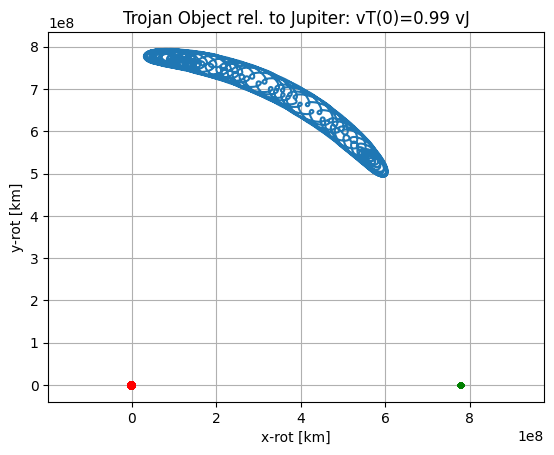

In [ ]:
"회전 좌표계에서 태양, 목성, 트로이 소행성의 궤적을 함께 나타내 본다"
plt.axis('equal')
plt.grid()
plt.xlabel("x-rot [km]")
plt.ylabel("y-rot [km]")

plt.plot(rotxS/km, rotyS/km, color='red', marker='o', linestyle='solid',
     linewidth=2, markersize=5)
plt.plot(rotxJ/km, rotyJ/km, color='green', marker='o', markersize=3)
plt.plot(rotxT/km, rotyT/km)
plt.title(f"Trojan Object rel. to Jupiter: vT(0)={vT/vJ} vJ")

plt.savefig(f"py-trojan{vT/vJ}vJ-rot.png")

In [ ]:
#시뮬레이션 결과를 파일로 저장

datadict = {"t":ts, "xS":sun.x, "yS":sun.y, \
            "xJ":jup.x, "yJ":jup.y, \
            "xT":tro.x, "yT":tro.y}

filePath = f'py-trojan{vT/vJ}vJ.csv'

df = pd.DataFrame(datadict)

df.to_csv(filePath, index=False)

In [ ]:
#회전좌표계의 궤적 데이타를 파일로 저장.
datadict = {"t":ts, "rotxS":rotxS, "rotyS":rotyS, \
            "rotxJ":rotxJ, "rotyJ":rotyJ, \
            "rotxT":rotxT, "rotyT":rotyT}
filePath = f'py-trojan{vT/vJ}vJ_rot.csv'

df = pd.DataFrame(datadict)

df.to_csv(filePath, ',', index=False)